#Theoretical

**1)What is a Decision Tree, and how does it work?**

Ans)A Decision Tree is a supervised machine learning algorithm for classification and regression. It works by creating a tree-like model where internal nodes are attribute tests, branches are test outcomes, and leaf nodes are class labels.

**2)What are impurity measures in Decision Trees?**

Ans)Impurity measures evaluate the homogeneity of samples within a node. The goal is to reduce impurity after a split, meaning samples in child nodes are more similar. Common measures are Gini Impurity and Entropy.

**3)What is the mathematical formula for Gini Impurity?**

Ans)
G(p)=1−
i=1
∑
C
​
 (p
i
​
 )
2


**4)What is the mathematical formula for Entropy?**

Ans)
H(p)=−
i=1
∑
C
​
 p
i
​
 log
2
​
 (p
i
​
 )


**5)What is Information Gain, and how is it used in Decision Trees?**

Ans)Information Gain quantifies the reduction in entropy after splitting a dataset on an attribute. It measures how much information a feature provides about the class labels. Decision Tree algorithms use Information Gain to select the best attribute for splitting a node.

**6)What is the difference between Gini Impurity and Entropy?**

Ans)Both Gini Impurity and Entropy measure impurity for splitting. Gini Impurity measures the probability of misclassification and is computationally faster. Entropy measures the average uncertainty and tends to produce more balanced trees.

**7)What is the mathematical explanation behind Decision Trees?**

Ans)The mathematical basis of Decision Trees is to find optimal splits that partition the feature space into homogeneous regions. For classification, this means minimizing impurity at each split using metrics. For regression, it means minimizing variance within each node.

**8)What is Pre-Pruning in Decision Trees?**

Ans)Pre-pruning involves halting the tree's growth before it fully classifies the training data. This is achieved by setting constraints like max_depth, min_samples_split, min_samples_leaf, or min_impurity_decrease during tree construction. Its purpose is to prevent overfitting by stopping growth when further splits offer negligible gain or nodes become too small.

**9)What is Post-Pruning in Decision Trees?**

Ans)Post-pruning involves growing a full Decision Tree first, then removing branches or nodes that contribute little to generalization performance. This process typically uses a separate validation set to evaluate and simplify the overfitted full tree. Common techniques include cost-complexity pruning.

**10)What is the difference between Pre-Pruning and Post-Pruning?**

Ans)Pre-pruning stops tree growth early based on predefined criteria during the training phase. Post-pruning allows the tree to grow fully first, then prunes back unnecessary branches based on validation performance.

**11)What is a Decision Tree Regressor?**

Ans)A Decision Tree Regressor is a Decision Tree model adapted for regression tasks. Instead of predicting a class label at each leaf node, it predicts the average of the target values of the samples within that leaf.

**12) What are the advantages and disadvantages of Decision Trees?**
Ans) Decision Trees are intuitive, handle diverse data (numerical/categorical), and need minimal preparation, making them easy to interpret and visualize. However, they are prone to overfitting, exhibit instability with minor data changes, and can be biased towards dominant classes, potentially finding only local optima.

**13) How does a Decision Tree handle missing values?**
Ans) Scikit-learn's Decision Trees typically require prior imputation or exclusion of rows with missing data. Other implementations, like some CART variations, can handle them directly using surrogate splits, sending samples down branches probabilistically, or treating 'missing' as a distinct category.

**14)How does a Decision Tree handle categorical features?**

Ans)Decision Trees handle categorical features in several ways. One common method, especially in scikit-learn, is One-Hot Encoding, converting categories into numerical binary vectors. This direct handling involves either splitting into multiple branches or creating binary splits by optimally grouping categories into two subsets to maximize impurity reduction.

**15)What are some real-world applications of Decision Trees?**

Ans)Decision Trees find broad application across diverse fields. In healthcare,finance,credit risk and detecting fraud,customer segmentation, churn prediction, and product recommendations,bioinformatics, image classification, and recommendation systems.

#Practical

**16) Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy?**

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


**17) Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances?**

In [2]:
clfgini = DecisionTreeClassifier(criterion='gini')
clfgini.fit(X_train, y_train)
print("Feature Importances", clfgini.feature_importances_)

Feature Importances [0.01667014 0.01667014 0.38926487 0.57739485]


**18) Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy?**

In [3]:
clfentropy = DecisionTreeClassifier(criterion='entropy')
clfentropy.fit(X_train, y_train)
y_pred_entropy = clfentropy.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))

Accuracy: 1.0


**19) Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)?**

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.5084311011329457


**20) Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz?**

In [5]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("DecisionTree")

'DecisionTree.pdf'

**21) Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree?**

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
y_pred_depth_3 = clf_depth3.predict(X_test)
print("Accuracy of Depth 3:", accuracy_score(y_test, y_pred_depth_3))

clffull = DecisionTreeClassifier()
clffull.fit(X_train, y_train)
y_pred_full = clffull.predict(X_test)
print("Accuracy of Full Tree:", accuracy_score(y_test, y_pred_full))

Accuracy of Depth 3: 1.0
Accuracy of Full Tree: 1.0


**22) Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree?**

In [7]:
clfsplit5 = DecisionTreeClassifier(min_samples_split=5)
clfsplit5.fit(X_train, y_train)

y_pred_split_5 = clfsplit5.predict(X_test)
print("Accuracy of minsamples", accuracy_score(y_test, y_pred_split_5))


Accuracy of minsamples 1.0


**23) Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data?**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
print("Accuracy with scaling", accuracy_score(y_test, y_pred_scaled))

Accuracy with scaling 1.0


**24) Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification?**

In [9]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))

OvR Accuracy: 1.0


**25) Write a Python program to train a Decision Tree Classifier and display the feature importance scores?**

In [10]:
print("Feature Importances", clf.feature_importances_)

Feature Importances [0.03334028 0.         0.38926487 0.57739485]


**26) Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree?**

In [11]:
regressor_depth5 = DecisionTreeRegressor(max_depth=5)
regressor_depth5.fit(X_train, y_train)
y_pred_depth_5 = regressor_depth5.predict(X_test)
regressor_unrestricted = DecisionTreeRegressor()
regressor_unrestricted.fit(X_train, y_train)
y_pred_unrestricted = regressor_unrestricted.predict(X_test)
print("MSE max_depth", mean_squared_error(y_test, y_pred_depth_5))
print("MSE Unrestricted", mean_squared_error(y_test, y_pred_unrestricted))

MSE max_depth 0.0
MSE Unrestricted 0.0


**27) Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy?**

In [12]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    y_pred_pruned = clf_pruned.predict(X_test)
    print(f"Alpha: {alpha}, Accuracy: {accuracy_score(y_test, y_pred_pruned)}")


Alpha: 0.0, Accuracy: 1.0
Alpha: 0.008095238095238095, Accuracy: 1.0
Alpha: 0.01111111111111111, Accuracy: 1.0
Alpha: 0.011111111111111113, Accuracy: 1.0
Alpha: 0.01621621621621623, Accuracy: 1.0
Alpha: 0.024119601328903645, Accuracy: 0.9666666666666667
Alpha: 0.24326537293107053, Accuracy: 0.6333333333333333
Alpha: 0.3334027777777779, Accuracy: 0.3


**28) Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score?**

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_metrics = DecisionTreeClassifier(random_state=42)
clf_metrics.fit(X_train, y_train)
y_pred_metrics = clf_metrics.predict(X_test)
precision = precision_score(y_test, y_pred_metrics, average='weighted')
recall = recall_score(y_test, y_pred_metrics, average='weighted')
f1 = f1_score(y_test, y_pred_metrics, average='weighted')
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")


Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000


**29) Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn?**

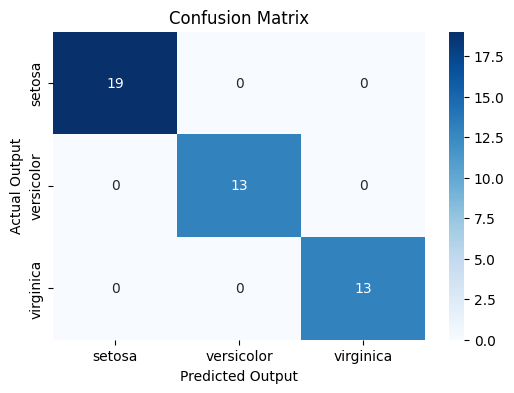

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.title("Confusion Matrix")
plt.show()

**30) Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split?**

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 10}
Best accuracy: 0.9428571428571428
